In [112]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
import seaborn as sns

sns.set()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt

df = pan.read_csv('diabetes.csv')
df.head()

,Pregnancies \n,Glucose \n,BloodPressure \n,SkinThickness \n,Insulin \n,BMI \n,DiabetesPedigreeFunction \n,Age \n,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [17]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

# Scale Data
sc_X = StandardScaler()
X =  pan.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [98]:
# Get Training Error
# X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

from sklearn import metrics
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
print(classification_report(y_test,predictions))

from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_test, predictions)
print("Error rate: ")
print(training_error)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity: ")
print(TP / float(TP+FN))
print("Specificity: ")
print(TN / float(TN+FP))

[[127  35]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.60      0.57      0.58        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254

Error rate: 
0.2952755905511811
Sensitivity: 
0.5652173913043478
Specificity: 
0.7839506172839507


In [99]:
# Test Error Rate for Logistic Regression
mis_rate = (confusion[[1],[0]].flat[0] + confusion[[0],[1]].flat[0])/len(y_test)
print(f"Test Error Rate = {mis_rate :.3f}")

Test Error Rate = 0.295


In [100]:
# Verify Using LOOCV
cv = LeaveOneOut()
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Average Absolute Error: ")
mean(absolute(scores))

Average Absolute Error: 


0.24708171206225682

In [101]:
print("Root Mean Squared Error: ")
sqrt(mean(absolute(scores)))

Root Mean Squared Error: 


0.4970731455854931

In [102]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
print(classification_report(y_test,predictions))

[[140  22]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       162
           1       0.72      0.61      0.66        92

    accuracy                           0.77       254
   macro avg       0.76      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



In [104]:
# Test Error Rate for LDA()
mis_rate = (confusion[[1],[0]].flat[0] + confusion[[0],[1]].flat[0])/len(y_test)
print(f"Test Error Rate = {mis_rate :.3f}")

Test Error Rate = 0.264


In [105]:
model = QDA()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
print(classification_report(y_test,predictions))

[[133  29]
 [ 38  54]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       162
           1       0.65      0.59      0.62        92

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.74      0.73       254



In [106]:
# Test Error Rate for QDA
mis_rate = (confusion[[1],[0]].flat[0] + confusion[[0],[1]].flat[0])/len(y_test)
print(f"Test Error Rate = {mis_rate :.3f}")

Test Error Rate = 0.264


In [107]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print(f"Mean of test error rate in test date is, {np.mean(scores) : .3f} with standard deviation = {np.std(scores) : .4f} ")

Mean of test error rate in test date is, -0.304 with standard deviation =  0.0444 


In [108]:
ks = np.arange(1, 201, 5)
ks
nks = ks.shape

err_rate_train = np.zeros(nks)
err_rate_test = np.zeros(nks)

for i, k in enumerate(ks):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    mod_train = model.predict(X_train)
    mod_test = model.predict(X_test)
    err_rate_train[i] = 1- (mod_train == y_train).mean()
    err_rate_test[i] = 1- (mod_test == y_test).mean()

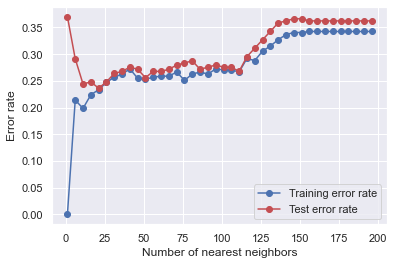

In [109]:
# Plot test and training errors vs the number of nearest neighbors
plot.plot(ks, err_rate_train, "bo-", label= "Training error rate")
plot.plot(ks, err_rate_test, "ro-", label= "Test error rate" )
plot.xlabel('Number of nearest neighbors')
plot.ylabel('Error rate')
plot.legend(loc="best")
plot.show()
# Optimal K = 50
k_opt = 50

In [110]:
model = KNeighborsClassifier(n_neighbors=k_opt)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
print(classification_report(y_test,predictions))

[[151  11]
 [ 59  33]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       162
           1       0.75      0.36      0.49        92

    accuracy                           0.72       254
   macro avg       0.73      0.65      0.65       254
weighted avg       0.73      0.72      0.69       254



In [111]:
# Test Error Rate for KNN at K = 50
mis_rate = (confusion[[1],[0]].flat[0] + confusion[[0],[1]].flat[0])/len(y_test)
print(f"Test Error Rate = {mis_rate :.3f}")

Test Error Rate = 0.276
